## I. Background
International trade has many advantages that countries and stakeholders can benefit from. Such as Increased revenues, Decreased competition, Longer product lifespan, Easier cash-flow management, Better risk management, Benefiting from currency exchange, Access to export financing, and Disposal of surplus goods. However, on the other hand, there are some problems and disadvantages of international trade. The most common problems that countries and stakeholders face in international trades are as follow: shipping customs and duties, language barriers, cultural differences, servicing customers, returning products, and intellectual property theft.

## 1. Libraries

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn import metrics 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from mlxtend.regressor import StackingCVRegressor

from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import skew
import os
import missingno as msno
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

## 2 - Reading Data

In this section:

2.1 Reading Data

2.2 Understanding the Data

2.3 Checking for missing values


The data was obtained from:https://www.kaggle.com/alexismayer/tradebetweencountries?select=samp_gravity.csv. This dataset was originally generated by Keith Head, Thierry Mayer and John Ries1 for the period 1984-2006.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thinkful/Data/samp_gravity.csv')

## 2.2 Understanding the Data

In [ ]:
df.head()

,year,iso_o,iso_d,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,iso2_o,pop_d,gdp_d,gdpcap_d,iso2_d,heg_d,conflict,indepdate,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror,family
0,1999,ABW,AGO,0,0,9587.315563,NaN,1722.905029,NaN,AW,13.500820,6154.479980,455.859711,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,0,NaN
1,2000,ABW,AGO,0,0,9587.315563,NaN,1858.659180,NaN,AW,13.840636,9129.179688,659.592468,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
2,2001,ABW,AGO,0,0,9587.315563,NaN,1898.882690,NaN,AW,14.214834,8936.023438,628.640686,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
3,2002,ABW,AGO,0,0,9587.315563,NaN,1911.173218,NaN,AW,14.618782,11431.738281,781.989807,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
4,2003,ABW,AGO,0,0,9587.315563,0.099,NaN,NaN,AW,15.046907,13956.267578,927.517334,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN


In [ ]:
df.value_counts()

year  iso_o  iso_d  contig  comlang_off  distw         pop_o       gdp_o         gdpcap_o      iso2_o  pop_d       gdp_d          gdpcap_d     iso2_d  heg_d  conflict  indepdate  heg_o  col_to  col_fr  col_hist  col_cur  sever   sib_conflict  gatt_o  gatt_d  rta  comleg  comcur  acp_to_eu  gsp  eu_to_acp  gsp_rec  flow        validmirror  family
2006  USA    PHL    0       1            13153.975615  298.988098  1.320182e+07  44155.000000  US      84.589760   116931.343750  1382.334473  PH      0      0.0       1946.0     1      1       0       1         0        1820.0  0.0           1       1       0    0       0       0          0    0          1        8403.52000  1            USA       1
1974  AUS    PNG    0       1            3087.280059   13.723000   1.002871e+05  7307.955566   AU      2.798718    1467.346069    524.292236   PG      0      0.0       1975.0     1      1       0       1         1        1901.0  0.0           1       0       0    1       0       0          0    0  

In [ ]:
df.describe()

,year,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,pop_d,gdp_d,gdpcap_d,heg_d,conflict,indepdate,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror
count,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,1.136274e+06,1.033419e+06,1.030200e+06,1.164851e+06,1.084849e+06,1.080866e+06,1.204671e+06,18862.000000,18862.000000,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,234446.000000,235366.000000,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06,1.204671e+06
mean,1.982100e+03,2.044127e-02,1.793004e-01,7.701469e+03,3.259678e+01,1.346621e+05,4.553223e+03,3.221703e+01,1.300253e+05,4.434455e+03,9.092109e-03,0.275050,1925.111653,7.988903e-03,7.988903e-03,9.092109e-03,1.708101e-02,3.585211e-03,1915.502551,0.262124,5.645425e-01,6.014323e-01,2.710948e-02,3.553925e-01,1.915959e-02,2.208985e-02,6.085064e-02,2.159760e-02,6.095689e-02,1.279010e+02,7.967545e-01
std,1.648490e+01,1.415042e-01,3.836038e-01,4.444266e+03,1.134587e+02,6.424885e+05,7.933045e+03,1.103110e+02,6.299589e+05,7.831898e+03,9.491812e-02,0.446551,59.238906,8.902296e-02,8.902296e-02,9.491812e-02,1.295734e-01,5.976923e-02,61.183516,0.439790,4.958170e-01,4.896036e-01,1.624025e-01,4.786323e-01,1.370858e-01,1.469759e-01,2.390562e-01,1.453656e-01,2.392513e-01,1.995513e+03,4.024139e-01
min,1.948000e+03,0.000000e+00,0.000000e+00,6.077057e+01,1.970000e-02,1.159205e+01,6.813283e+00,1.970000e-02,1.159205e+01,6.813283e+00,0.000000e+00,0.000000,1710.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1763.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.969000e+03,0.000000e+00,0.000000e+00,4.177173e+03,2.113000e+00,1.706000e+03,3.577469e+02,2.503799e+00,1.705801e+03,3.500164e+02,0.000000e+00,0.000000,1901.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1901.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.984000e+03,0.000000e+00,0.000000e+00,7.333459e+03,7.153015e+00,7.638028e+03,1.161255e+03,7.553096e+00,7.327690e+03,1.118617e+03,0.000000e+00,0.000000,1954.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1947.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.860000e-02,1.000000e+00
75%,1.997000e+03,0.000000e+00,0.000000e+00,1.067430e+04,2.152495e+01,4.817786e+04,4.255546e+03,2.204800e+01,4.491000e+04,4.071642e+03,0.000000e+00,1.000000,1966.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1960.000000,1.000000,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.330000e+00,1.000000e+00
max,2.006000e+03,1.000000e+00,1.000000e+00,1.978139e+04,1.311798e+03,1.320182e+07,8.956363e+04,1.311798e+03,1.320182e+07,8.956363e+04,1.000000e+00,1.000000,1999.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1997.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.484206e+05,1.000000e+00


In [ ]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 1204671
Total number of columns in dataset = 36


In [ ]:
df['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1984,
       1985, 1982, 1983, 1980, 1981, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1948, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1949, 1950, 1951])

In [ ]:
df['iso_o'].nunique()

208

In [ ]:
df.year.value_counts()

2003    30578
2006    30574
2005    30567
2002    30552
2004    30545
2001    30536
2000    30498
1999    29856
1996    29655
1998    29508
1995    29139
1997    29053
1994    28547
1993    27399
1992    25703
1991    23694
1990    23376
1989    22668
1988    22104
1987    21892
1986    21436
1985    21287
1984    21094
1983    20981
1982    20938
1981    20868
1974    19410
1973    19397
1975    19193
1977    19099
1980    19050
1972    19007
1976    18987
1978    18932
1971    18861
1979    18826
1970    18787
1969    18135
1968    17872
1967    17634
1966    17392
1964    17212
1965    16989
1963    16358
1962    15025
1961    14652
1960    14357
1959    13917
1958    13183
1956    12888
1955    12744
1957    12641
1948    12094
1953    11820
1952    11684
1954    11628
1951    11483
1950    11217
1949    11149
Name: year, dtype: int64

In [ ]:
df.iso_o.value_counts()

GBR    9411
NLD    9194
FRA    9166
JPN    9145
BEL    9131
       ... 
MHL      14
SMR      14
AND      14
TMP       5
FSM       1
Name: iso_o, Length: 208, dtype: int64

In [ ]:
df_2=df.copy(deep=True)

In [ ]:
df_2.head()

,year,iso_o,iso_d,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,iso2_o,pop_d,gdp_d,gdpcap_d,iso2_d,heg_d,conflict,indepdate,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror,family
0,1999,ABW,AGO,0,0,9587.315563,NaN,1722.905029,NaN,AW,13.500820,6154.479980,455.859711,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,0,NaN
1,2000,ABW,AGO,0,0,9587.315563,NaN,1858.659180,NaN,AW,13.840636,9129.179688,659.592468,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
2,2001,ABW,AGO,0,0,9587.315563,NaN,1898.882690,NaN,AW,14.214834,8936.023438,628.640686,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
3,2002,ABW,AGO,0,0,9587.315563,NaN,1911.173218,NaN,AW,14.618782,11431.738281,781.989807,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN
4,2003,ABW,AGO,0,0,9587.315563,0.099,NaN,NaN,AW,15.046907,13956.267578,927.517334,AO,0,NaN,NaN,0,0,0,0,0,NaN,NaN,0,1,0,1,0,0,0,0,0,0.0,1,NaN


## Filtering the dataset for the origing country as USA and years after 2000

In [ ]:
df_redueced=(df_2['iso_o']=='USA')&(df_2['year']>=2000)

In [ ]:
df_redueced.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
df_redueced.value_counts()

False    1203313
True        1358
dtype: int64

In [ ]:
df_redueced.values

array([False, False, False, ..., False, False, False])

## Creating dataframe from filtered dataset

In [ ]:
new_df=df.iloc[df_redueced.values]

In [ ]:
test=df.iloc[df_redueced.values]

In [ ]:
new_df.head()

,year,iso_o,iso_d,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,iso2_o,pop_d,gdp_d,gdpcap_d,iso2_d,heg_d,conflict,indepdate,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror,family
1129144,2000,USA,ABW,0,0,3859.885497,282.223999,9764800.0,34599.468750,US,NaN,1858.659180,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,408.177,1,NaN
1129145,2001,USA,ABW,0,0,3859.885497,285.317993,10075900.0,35314.632812,US,NaN,1898.882690,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,459.788,1,NaN
1129146,2002,USA,ABW,0,0,3859.885497,288.368988,10417600.0,36125.937500,US,NaN,1911.173218,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,511.170,1,NaN
1129147,2003,USA,ABW,0,0,3859.885497,290.809998,10918500.0,37545.132812,US,0.099,NaN,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,467.758,1,NaN
1129148,2004,USA,ABW,0,0,3859.885497,293.655396,11679200.0,39771.789062,US,0.099,NaN,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,485.820,1,NaN


In [ ]:
new_df.shape

(1358, 36)

At this point it seems that there is a large data set with NaN values. Try to drop all NaN values from the data set.

In [ ]:
df2=new_df.dropna()

In [ ]:
print ("Total number of rows in dataset = {}".format(df2.shape[0]))
print ("Total number of columns in dataset = {}".format(df2.shape[1]))

Total number of rows in dataset = 7
Total number of columns in dataset = 36


There is hugue reduction in data set volume, for that reason it will not be reasonable to drop the NaN values. 

In [ ]:
new_df.dtypes

year              int64
iso_o            object
iso_d            object
contig            int64
comlang_off       int64
distw           float64
pop_o           float64
gdp_o           float64
gdpcap_o        float64
iso2_o           object
pop_d           float64
gdp_d           float64
gdpcap_d        float64
iso2_d           object
heg_d             int64
conflict        float64
indepdate       float64
heg_o             int64
col_to            int64
col_fr            int64
col_hist          int64
col_cur           int64
sever           float64
sib_conflict    float64
gatt_o            int64
gatt_d            int64
rta               int64
comleg            int64
comcur            int64
acp_to_eu         int64
gsp               int64
eu_to_acp         int64
gsp_rec           int64
flow            float64
validmirror       int64
family           object
dtype: object

## 2.3 Checking for Missing Values

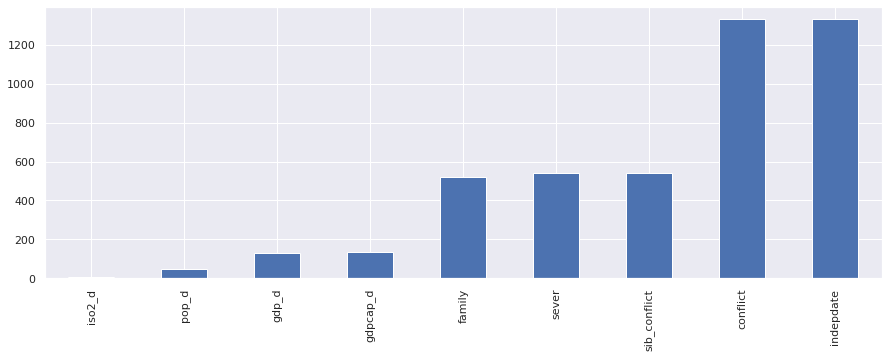

In [ ]:
# Visualizing missing counts
missing = new_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.subplots(figsize=(15,5))
missing.plot.bar()
plt.show()

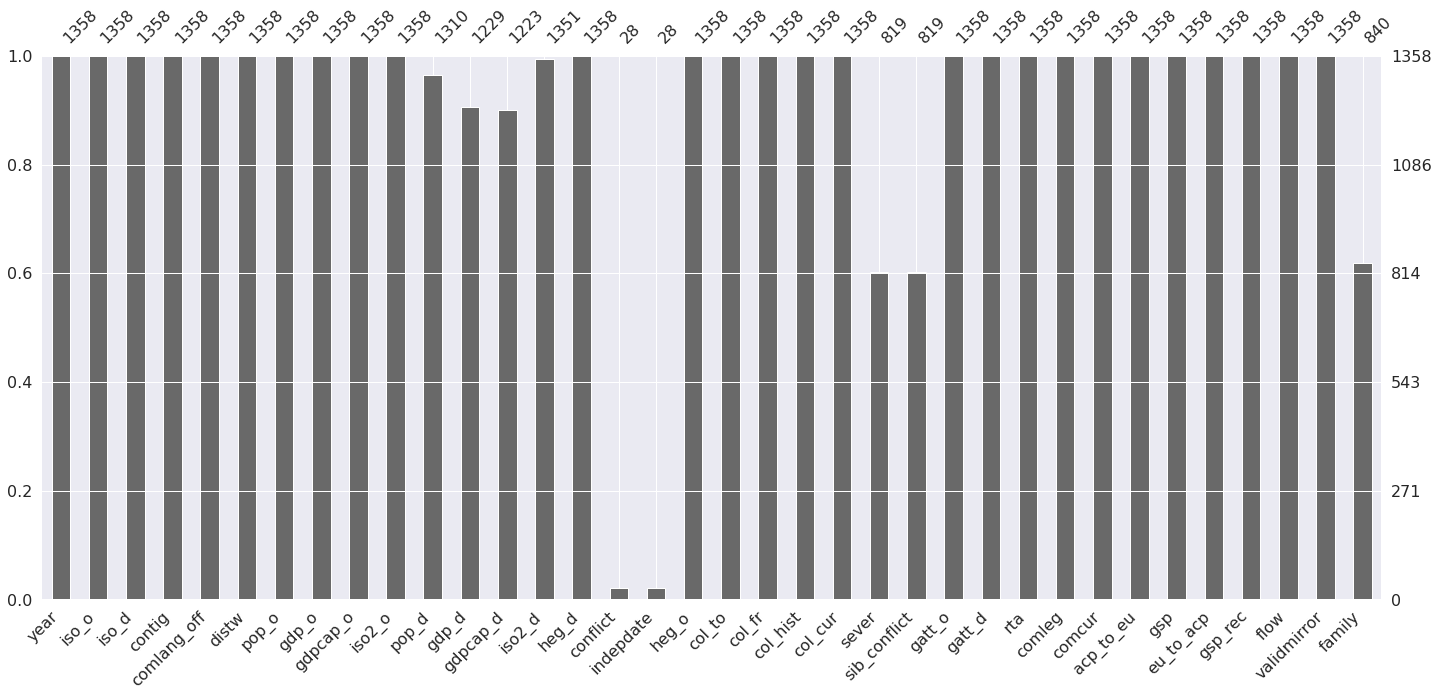

In [ ]:
msno.bar(new_df)

## White spaces shows the missing value in the data frame.

## Dropping the features with more than 50% missing values. 



In [ ]:
# Drop all columns with more than 50% of it's values missing
df_dc = new_df[new_df.columns[new_df.isnull().mean() < 0.5]]
df_dc.head()

,year,iso_o,iso_d,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,iso2_o,pop_d,gdp_d,gdpcap_d,iso2_d,heg_d,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror,family
1129144,2000,USA,ABW,0,0,3859.885497,282.223999,9764800.0,34599.468750,US,NaN,1858.659180,NaN,AW,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,408.177,1,NaN
1129145,2001,USA,ABW,0,0,3859.885497,285.317993,10075900.0,35314.632812,US,NaN,1898.882690,NaN,AW,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,459.788,1,NaN
1129146,2002,USA,ABW,0,0,3859.885497,288.368988,10417600.0,36125.937500,US,NaN,1911.173218,NaN,AW,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,511.170,1,NaN
1129147,2003,USA,ABW,0,0,3859.885497,290.809998,10918500.0,37545.132812,US,0.099,NaN,NaN,AW,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,467.758,1,NaN
1129148,2004,USA,ABW,0,0,3859.885497,293.655396,11679200.0,39771.789062,US,0.099,NaN,NaN,AW,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,485.820,1,NaN


In [ ]:
new_df2=new_df.copy()

In [ ]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 1129144 to 1138188
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1358 non-null   int64  
 1   iso_o         1358 non-null   object 
 2   iso_d         1358 non-null   object 
 3   contig        1358 non-null   int64  
 4   comlang_off   1358 non-null   int64  
 5   distw         1358 non-null   float64
 6   pop_o         1358 non-null   float64
 7   gdp_o         1358 non-null   float64
 8   gdpcap_o      1358 non-null   float64
 9   iso2_o        1358 non-null   object 
 10  pop_d         1310 non-null   float64
 11  gdp_d         1229 non-null   float64
 12  gdpcap_d      1223 non-null   float64
 13  iso2_d        1351 non-null   object 
 14  heg_d         1358 non-null   int64  
 15  conflict      28 non-null     float64
 16  indepdate     28 non-null     float64
 17  heg_o         1358 non-null   int64  
 18  col_to        1358 

In [ ]:
new_df2d=new_df2.drop(columns=['iso_o'])

In [ ]:
new_df2d.head()

,year,iso_d,contig,comlang_off,distw,pop_o,gdp_o,gdpcap_o,iso2_o,pop_d,gdp_d,gdpcap_d,iso2_d,heg_d,conflict,indepdate,heg_o,col_to,col_fr,col_hist,col_cur,sever,sib_conflict,gatt_o,gatt_d,rta,comleg,comcur,acp_to_eu,gsp,eu_to_acp,gsp_rec,flow,validmirror,family
1129144,2000,ABW,0,0,3859.885497,282.223999,9764800.0,34599.468750,US,NaN,1858.659180,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,408.177,1,NaN
1129145,2001,ABW,0,0,3859.885497,285.317993,10075900.0,35314.632812,US,NaN,1898.882690,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,459.788,1,NaN
1129146,2002,ABW,0,0,3859.885497,288.368988,10417600.0,36125.937500,US,NaN,1911.173218,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,511.170,1,NaN
1129147,2003,ABW,0,0,3859.885497,290.809998,10918500.0,37545.132812,US,0.099,NaN,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,467.758,1,NaN
1129148,2004,ABW,0,0,3859.885497,293.655396,11679200.0,39771.789062,US,0.099,NaN,NaN,AW,0,NaN,NaN,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,485.820,1,NaN


## Check to see how much data is missing in each column

In [ ]:
# Find how much data is missing in each column
# Function to look at missing rows per column
def missing(dataset):
    columns = dataset.columns
    print('MISSING ROWS per COLUMN')
    for column in columns:
        percentage = (dataset[column].isnull().sum() / len(df)) * 100
        print('{}: {}, {:0.2f}%'.format(column, dataset[column].isnull().sum(), percentage))
        
        
# Missing rows per column       
missing(new_df)

MISSING ROWS per COLUMN
year: 0, 0.00%
iso_o: 0, 0.00%
iso_d: 0, 0.00%
contig: 0, 0.00%
comlang_off: 0, 0.00%
distw: 0, 0.00%
pop_o: 0, 0.00%
gdp_o: 0, 0.00%
gdpcap_o: 0, 0.00%
iso2_o: 0, 0.00%
pop_d: 48, 0.00%
gdp_d: 129, 0.01%
gdpcap_d: 135, 0.01%
iso2_d: 7, 0.00%
heg_d: 0, 0.00%
conflict: 1330, 0.11%
indepdate: 1330, 0.11%
heg_o: 0, 0.00%
col_to: 0, 0.00%
col_fr: 0, 0.00%
col_hist: 0, 0.00%
col_cur: 0, 0.00%
sever: 539, 0.04%
sib_conflict: 539, 0.04%
gatt_o: 0, 0.00%
gatt_d: 0, 0.00%
rta: 0, 0.00%
comleg: 0, 0.00%
comcur: 0, 0.00%
acp_to_eu: 0, 0.00%
gsp: 0, 0.00%
eu_to_acp: 0, 0.00%
gsp_rec: 0, 0.00%
flow: 0, 0.00%
validmirror: 0, 0.00%
family: 518, 0.04%


In [ ]:
#descriptive statistics summary
new_df['gdp_o'].describe()

count    1.358000e+03
mean     1.121118e+07
std      1.179507e+06
min      9.764800e+06
25%      1.007590e+07
50%      1.091850e+07
75%      1.241650e+07
max      1.320182e+07
Name: gdp_o, dtype: float64

## 3 - Data Visualization

In this section:

3.1 Viewing Columns


3.2 Distribution of Data


3.3 Univariate Analysis of Data


3.4 Bivariate Analysis of Data

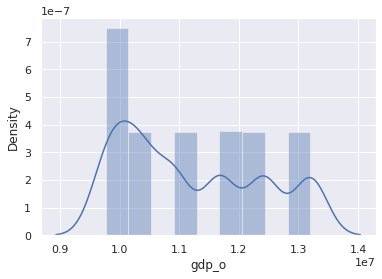

In [ ]:
#histogram
sns.distplot(new_df['gdp_o']);

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % new_df['gdp_o'].skew())
print("Kurtosis: %f" % new_df['gdp_o'].kurt())

Skewness: 0.412568
Kurtosis: -1.203623


## 3.1 Viewing Columns
[credit](https://www.kaggle.com/prestonfan/house-pricing-ultimate-guide?scriptVersionId=38708063)


In [ ]:
## Numerical Columns
numerical_features = new_df.select_dtypes(exclude=['object']).drop(['gdp_o'], axis=1).copy()
print(numerical_features.columns)

Index(['year', 'contig', 'comlang_off', 'distw', 'pop_o', 'gdpcap_o', 'pop_d',
       'gdp_d', 'gdpcap_d', 'heg_d', 'conflict', 'indepdate', 'heg_o',
       'col_to', 'col_fr', 'col_hist', 'col_cur', 'sever', 'sib_conflict',
       'gatt_o', 'gatt_d', 'rta', 'comleg', 'comcur', 'acp_to_eu', 'gsp',
       'eu_to_acp', 'gsp_rec', 'flow', 'validmirror'],
      dtype='object')


In [ ]:
## Categorical Columns 
categorical_features = new_df.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

Index(['iso_o', 'iso_d', 'iso2_o', 'iso2_d', 'family'], dtype='object')


## 3.2 Distribution plots for list of numerical features

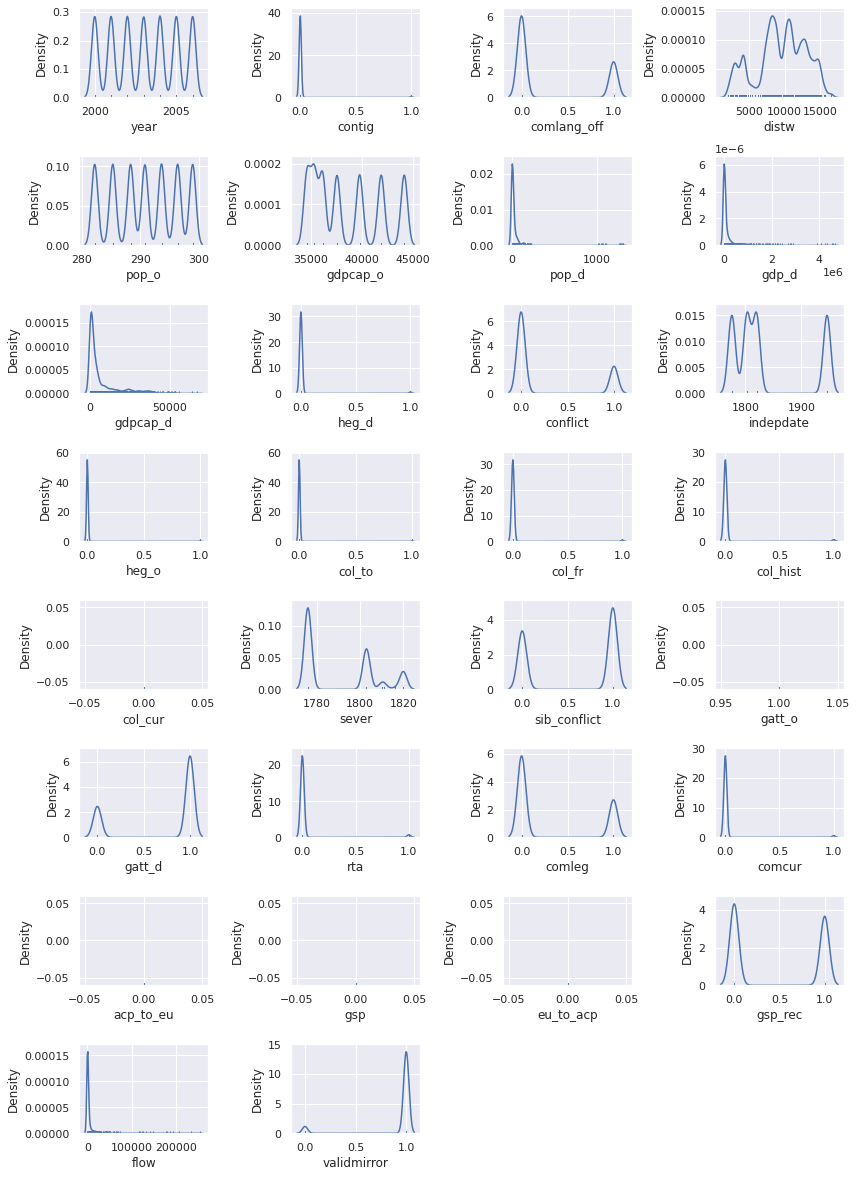

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(numerical_features.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(numerical_features.columns[i])
plt.tight_layout()
plt.show()

## 3.3 Univariate Analysis

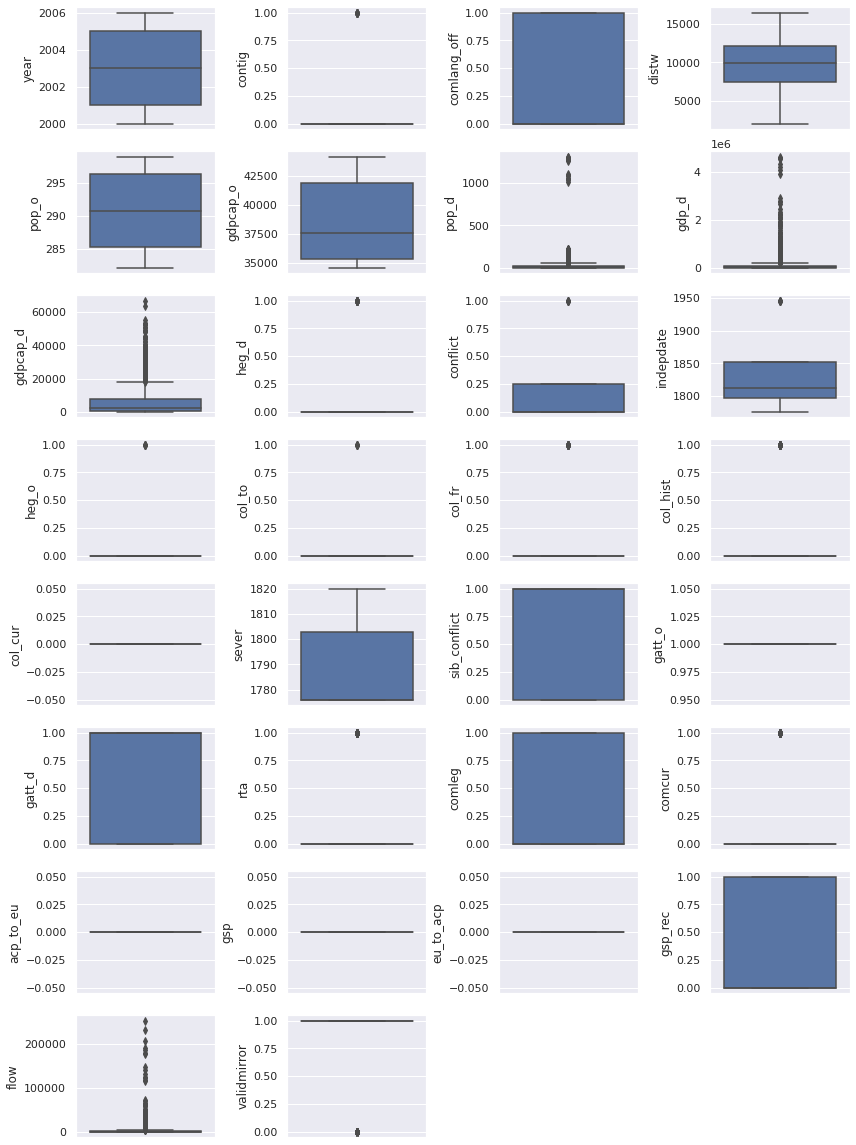

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

## 3.4 Bivariate Analysis

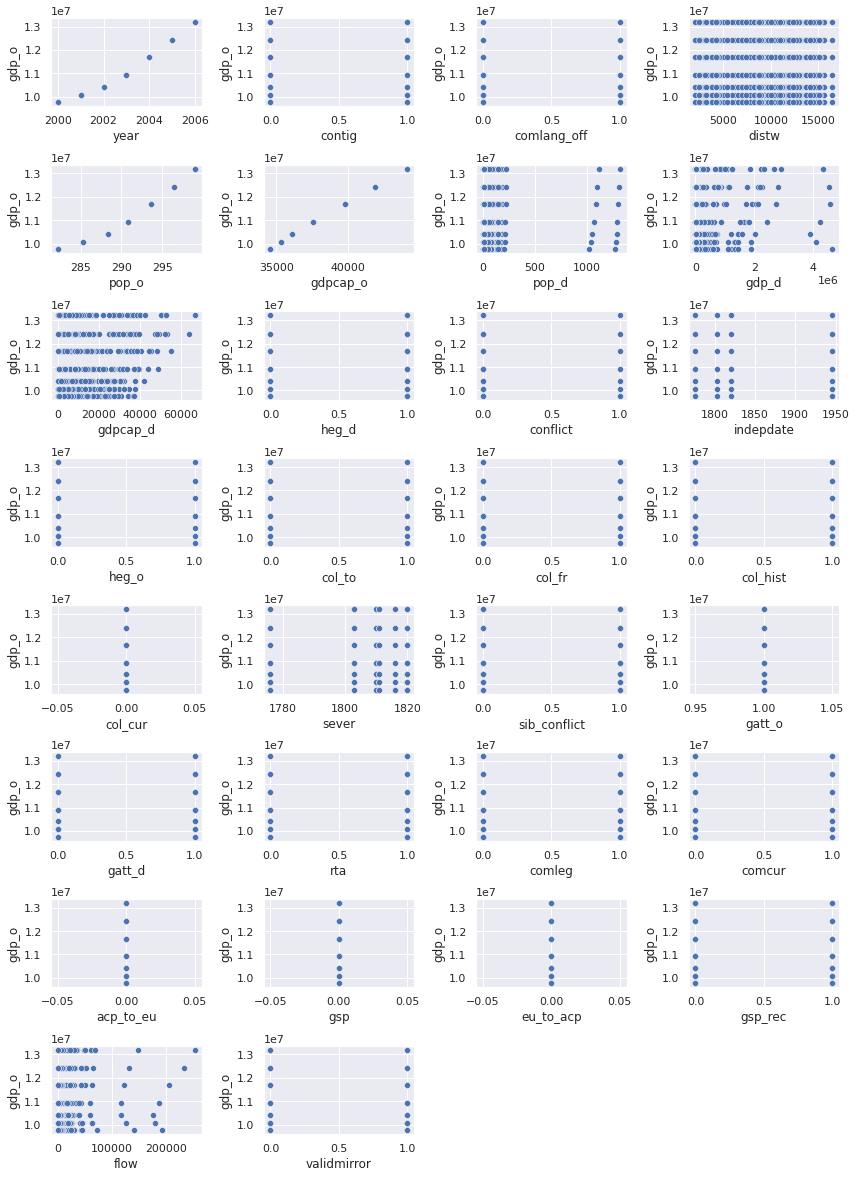

In [ ]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(numerical_features.iloc[:, i],new_df['gdp_o'])
plt.tight_layout()
plt.show()

## 4 - Data Processing
4.1 Outliers

4.2 Removing Certain Features

4.3 Filling Numerical Missing Values

4.4 Filling Categorical Missing Values



## Notes on Outliers: According to the plots above, these are the features which appear to have outliers:
'contig',  'pop_d',  'gdp_d', 'gdpcap_d',  'conflict', 'indepdate', 'flow'

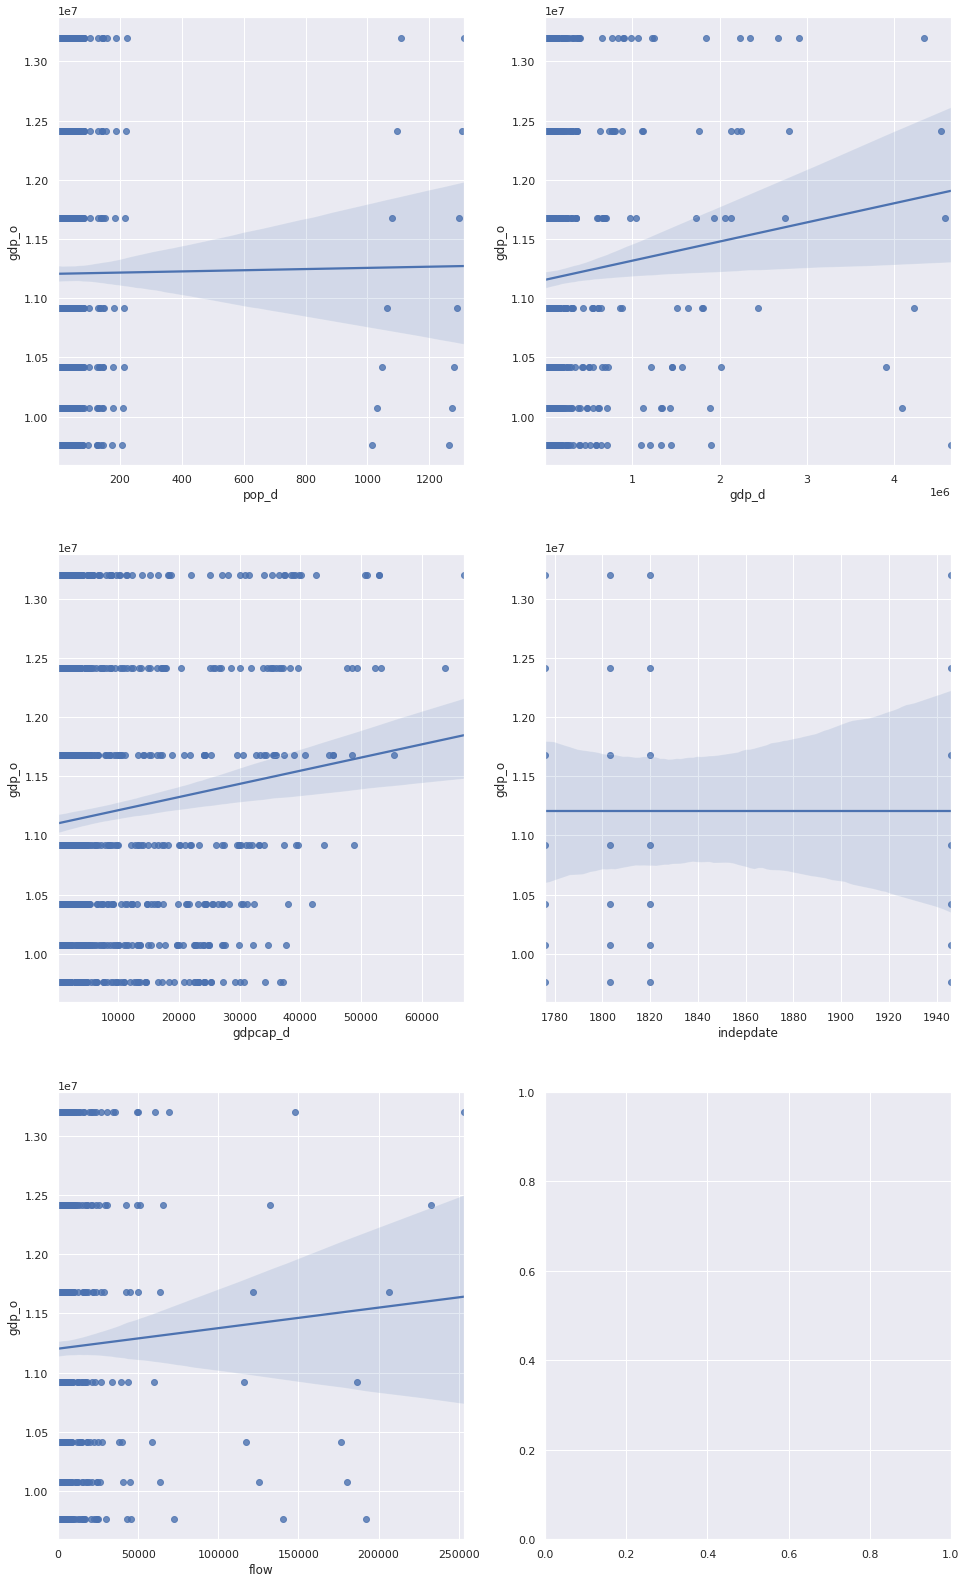

In [ ]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(16,28)
_ = sns.regplot(new_df['pop_d'], new_df['gdp_o'], ax=ax1)
_ = sns.regplot(new_df['gdp_d'], new_df['gdp_o'], ax=ax2)
_ = sns.regplot(new_df['gdpcap_d'], new_df['gdp_o'], ax=ax3)
_ = sns.regplot(new_df['indepdate'], new_df['gdp_o'], ax=ax4)
_ = sns.regplot(new_df['flow'], new_df['gdp_o'], ax=ax5)

In [ ]:
new_df.gdpcap_d.describe()

count     1223.000000
mean      7018.111891
std      10863.336640
min         84.557396
25%        626.327850
50%       2119.447510
75%       7659.993652
max      66964.367188
Name: gdpcap_d, dtype: float64

In [ ]:
new_df.indepdate.describe()

count      28.000000
mean     1836.250000
std        66.475629
min      1776.000000
25%      1796.250000
50%      1811.500000
75%      1851.500000
max      1946.000000
Name: indepdate, dtype: float64

In [ ]:
new_df.gdp_d.describe()

count    1.229000e+03
mean     1.518791e+05
std      4.704251e+05
min      4.829947e+01
25%      2.821606e+03
50%      1.118645e+04
75%      8.548410e+04
max      4.649615e+06
Name: gdp_d, dtype: float64

In [ ]:
new_df.pop_d.describe()

count    1310.000000
mean       31.870993
std       124.115005
min         0.044286
25%         1.798406
50%         6.933600
75%        21.634295
max      1311.797729
Name: pop_d, dtype: float64

## From these regplots we have confirmed there are outliers, so we decide to remove them

In [ ]:
new_df = new_df.drop(new_df[new_df['gdpcap_d']>20000 ].index)
new_df = new_df.drop(new_df[new_df['indepdate']>1934 ].index)
new_df = new_df.drop(new_df[new_df['gdp_d']>209479 ].index)
new_df = new_df.drop(new_df[new_df['pop_d']>51.388129 ].index)

## 4.2 Removing Certain Features

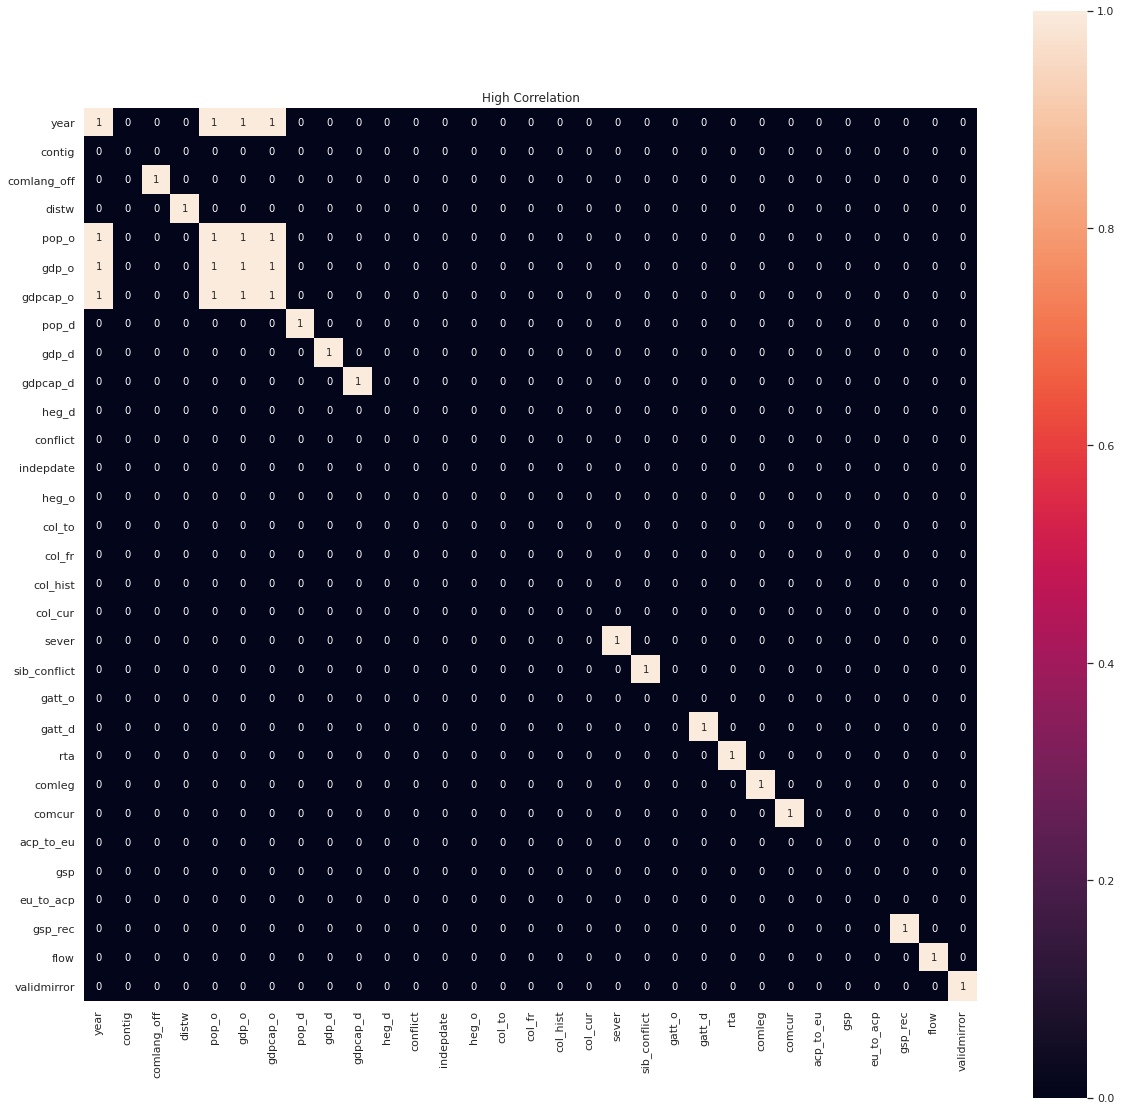

In [ ]:
num_correlation = new_df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(20,20))
plt.title('High Correlation')
sns.heatmap(num_correlation > 0.8, annot=True, square=True)

## Highly-Correlated Features:

some of the features which are highly correlated that means which are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost. Droping highly correlated features helps  to escape curse of dimensionality.

Highly correlated features:

year and gdp_o

year and pop_o

year and gdpcap_o

gdp_o and pop_o

gdocap_o and pop_o 


In [ ]:
corr = num_correlation.corr()
print(corr['gdp_o'].sort_values(ascending=False))

gdp_o           1.000000
gdpcap_o        0.999993
year            0.999766
pop_o           0.999694
sever           0.090879
rta             0.024139
distw          -0.074987
gdpcap_d       -0.090007
comcur         -0.106678
comlang_off    -0.124972
gdp_d          -0.139431
sib_conflict   -0.153071
flow           -0.169676
validmirror    -0.171090
comleg         -0.177036
gsp_rec        -0.192400
pop_d          -0.205441
gatt_d         -0.208303
contig               NaN
heg_d                NaN
conflict             NaN
indepdate            NaN
heg_o                NaN
col_to               NaN
col_fr               NaN
col_hist             NaN
col_cur              NaN
gatt_o               NaN
acp_to_eu            NaN
gsp                  NaN
eu_to_acp            NaN
Name: gdp_o, dtype: float64


gdp_o           
gdpcap_o        
year            
pop_o

In [ ]:
new_df.drop(columns=[ 'gdpcap_o','year', 'pop_o'],axis=1,inplace=True)
test.drop(columns=['gdpcap_o','year', 'pop_o'],axis=1,inplace=True) 

## Lets see which features have the most missing values...

In [ ]:
new_df.isnull().mean().sort_values(ascending=False).head(10)

indepdate       1.000000
conflict        1.000000
sib_conflict    0.330484
sever           0.330484
family          0.330484
gdpcap_d        0.128205
gdp_d           0.122507
pop_d           0.045584
iso2_d          0.006648
distw           0.000000
dtype: float64

In [ ]:
new_df.drop(columns=['indepdate', 'conflict'],axis=1,inplace=True)
test.drop(columns=['indepdate', 'conflict'],axis=1,inplace=True)

In [ ]:
test.isnull().mean().sort_values(ascending=False).head(3)

sib_conflict    0.396907
sever           0.396907
family          0.381443
dtype: float64

## Test data doesn't have any features that have over 50% of missing values. So we don't drop any features.

## 4.3 Filling Numerical Missing Values


In [ ]:
# Checking new_df and Test data missing value percentage
null = pd.DataFrame(data={'new_df Null Percentage':new_df.isnull().sum()[new_df.isnull().sum() > 0], 'Test Null Percentage': test.isnull().sum()[test.isnull().sum() > 0]})
null = (null/len(new_df)) * 100

null.index.name='Feature'
null

,new_df Null Percentage,Test Null Percentage
Feature,,
pop_d,4.558405,4.558405
gdp_d,12.250712,12.250712
gdpcap_d,12.820513,12.820513
iso2_d,0.664767,0.664767
sever,33.048433,51.187085
sib_conflict,33.048433,51.187085
family,33.048433,49.192783


In [ ]:
new_df.isnull().sum().sort_values(ascending=False)[:50]

family          348
sib_conflict    348
sever           348
gdpcap_d        135
gdp_d           129
pop_d            48
iso2_d            7
col_to            0
iso_d             0
contig            0
comlang_off       0
distw             0
gdp_o             0
iso2_o            0
heg_d             0
heg_o             0
col_hist          0
col_fr            0
validmirror       0
col_cur           0
gatt_o            0
gatt_d            0
rta               0
comleg            0
comcur            0
acp_to_eu         0
gsp               0
eu_to_acp         0
gsp_rec           0
flow              0
iso_o             0
dtype: int64

In [ ]:
new_df_num_features = new_df.select_dtypes(exclude='object').isnull().mean()
test_num_features = test.select_dtypes(exclude='object').isnull().mean()

num_null_features = pd.DataFrame(data={'Missing Num new_df Percentage: ': new_df_num_features[new_df_num_features>0], 'Missing Num Test Percentage: ': test_num_features[test_num_features>0]})
num_null_features.index.name = 'Numerical Features'
num_null_features

,Missing Num new_df Percentage:,Missing Num Test Percentage:
Numerical Features,,
pop_d,0.045584,0.035346
gdp_d,0.122507,0.094993
gdpcap_d,0.128205,0.099411
sever,0.330484,0.396907
sib_conflict,0.330484,0.396907


In [ ]:
for df in [new_df, test]:
    for col in ('comlang_off', 'distw','pop_d',
       'gdp_d', 'gdpcap_d', 'heg_d','heg_o',
       'col_to', 'col_fr', 'col_hist', 'col_cur', 'sever', 'sib_conflict',
       'gatt_o', 'gatt_d', 'rta', 'comleg', 'comcur', 'acp_to_eu', 'gsp',
       'eu_to_acp', 'gsp_rec', 'flow', 'validmirror'):
                    df[col] = df[col].fillna(0)

In [ ]:
new_df_num_features = new_df.select_dtypes(exclude='object').isnull().mean()
test_num_features = test.select_dtypes(exclude='object').isnull().mean()

num_null_features = pd.DataFrame(data={'Missing Num new_df Percentage: ': new_df_num_features[new_df_num_features>0], 'Missing Num Test Percentage: ': test_num_features[test_num_features>0]})
num_null_features.index.name = 'Numerical Features'
num_null_features

,Missing Num new_df Percentage:,Missing Num Test Percentage:
Numerical Features,,


## 4.4 Filling Categorical Missing Values

In [ ]:
cat_col = new_df.select_dtypes(include='object').columns
print(cat_col)

Index(['iso_o', 'iso_d', 'iso2_o', 'iso2_d', 'family'], dtype='object')


In [ ]:
new_df_cat_features = new_df.select_dtypes(include='object').isnull().mean()
test_cat_features = test.select_dtypes(include='object').isnull().mean()

cat_null_features = pd.DataFrame(data={'Missing Cat new_df Percentage: ': new_df_cat_features[new_df_cat_features>0], 'Missing Cat Test Percentage: ': test_cat_features[test_cat_features>0]})
cat_null_features.index.name = 'Categorical Features'
cat_null_features

,Missing Cat new_df Percentage:,Missing Cat Test Percentage:
Categorical Features,,
iso2_d,0.006648,0.005155
family,0.330484,0.381443


In [ ]:
for df in [new_df, test]:
    for col in ('iso2_d','family'):
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
new_df_cat_features = new_df.select_dtypes(include='object').isnull().mean()
test_cat_features = test.select_dtypes(include='object').isnull().mean()

cat_null_features = pd.DataFrame(data={'Missing Cat new_df Percentage: ': new_df_cat_features[new_df_cat_features>0], 'Missing Cat Test Percentage: ': test_cat_features[test_cat_features>0]})
cat_null_features.index.name = 'Categorical Features'
cat_null_features

,Missing Cat new_df Percentage:,Missing Cat Test Percentage:
Categorical Features,,



## 5 - Modelling

In this section:

5.1 Dealing with Data for Modelling

5.2 Finding the Best Model

5.3 Setting up Final Model for Submission

## 5.1 Dealing with Data for Modelling

In [ ]:
X = new_df.drop(['gdp_o'], axis=1)
y = np.log1p(new_df['gdp_o'])

Split X and y into train and valid data for model testing

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=2)

In [ ]:
X_train.shape, X_valid.shape

((842, 30), (211, 30))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 1132883 to 1134033
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso_o         842 non-null    object 
 1   iso_d         842 non-null    object 
 2   contig        842 non-null    int64  
 3   comlang_off   842 non-null    int64  
 4   distw         842 non-null    float64
 5   iso2_o        842 non-null    object 
 6   pop_d         842 non-null    float64
 7   gdp_d         842 non-null    float64
 8   gdpcap_d      842 non-null    float64
 9   iso2_d        842 non-null    object 
 10  heg_d         842 non-null    int64  
 11  heg_o         842 non-null    int64  
 12  col_to        842 non-null    int64  
 13  col_fr        842 non-null    int64  
 14  col_hist      842 non-null    int64  
 15  col_cur       842 non-null    int64  
 16  sever         842 non-null    float64
 17  sib_conflict  842 non-null    float64
 18  gatt_o        842 no

We select every numerical column from X and the categorical columns with unique values under 30

In [ ]:
categorical_cols = [cname for cname in X.columns if
                    X[cname].nunique() <= 30 and
                    X[cname].dtype == "object"] 
                


numerical_cols = [cname for cname in X.columns if
                 X[cname].dtype in ['int64','float64']]


my_cols = numerical_cols + categorical_cols

X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
X_test = test[my_cols].copy()

In [ ]:
# Convert columns that are not numeric to a numeric value
for c in X_train.columns:
    if X_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[c].values))
        X_train[c] = lbl.transform(list(X_train[c].values))
        # x_train_full.drop(c,axis=1,inplace=True)

Here we create a 'num_transformer' and a 'cat_transformer' for imputing and hot-encoding numerical and categorical values. We then store these transformers into a preprocessor column transformer

In [ ]:
num_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='constant'))
    ])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_cols),       
        ('cat',cat_transformer,categorical_cols),
        ])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 1132883 to 1134033
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   contig        842 non-null    int64  
 1   comlang_off   842 non-null    int64  
 2   distw         842 non-null    float64
 3   pop_d         842 non-null    float64
 4   gdp_d         842 non-null    float64
 5   gdpcap_d      842 non-null    float64
 6   heg_d         842 non-null    int64  
 7   heg_o         842 non-null    int64  
 8   col_to        842 non-null    int64  
 9   col_fr        842 non-null    int64  
 10  col_hist      842 non-null    int64  
 11  col_cur       842 non-null    int64  
 12  sever         842 non-null    float64
 13  sib_conflict  842 non-null    float64
 14  gatt_o        842 non-null    int64  
 15  gatt_d        842 non-null    int64  
 16  rta           842 non-null    int64  
 17  comleg        842 non-null    int64  
 18  comcur        842 no

## 5.2 Finding the Best Model

## 5.2.1  XGBoost Algorithm 


XGBoost stands for Extreme [Gradient Boosting](https://https://www.kaggle.com/prashant111/xgboost-k-fold-cv-feature-importance).

It is a performant machine learning library based on the paper Greedy Function Approximation: A Gradient Boosting Machine, by Friedman

It is an open source machine learning library providing a high-performance implementation of gradient boosted decision trees.

It is originally written in C++ and is comparatively faster than other ensemble classifiers.

It belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core.

XGBoost implements a Gradient Boosting algorithm based on decision trees.

So, to understand XGBoost completely, we need to understand Gradient Boosting Algorithm (discussed later).

Please follow the links below for more in-depth discussion on XGBoost.

[XGBoost Official Documentation](https://https://xgboost.readthedocs.io/en/latest/)

## 5.2.2 [Lasso Regression](https://https://machinelearningmastery.com/lasso-regression-with-python/)
Linear regression refers to a model that assumes a linear relationship between input variables and the target variable.

With a single input variable, this relationship is a line, and with higher dimensions, this relationship can be thought of as a hyperplane that connects the input variables to the target variable. The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yhat) and the expected target values (y).

loss = sum i=0 to n (y_i – yhat_i)^2
A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. This is particularly true for problems with few observations (samples) or more samples (n) than input predictors (p) or variables (so-called p >> n problems).

## 5.2.3 [Gradient Tree Boosting](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting)

Gradient Tree Boosting or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.


## 5.2.4 [Decision Trees](https://https://scikit-learn.org/stable/modules/tree.html#tree)

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

## 5.2.5 [Random Forest ](https://scikit-learn.org/0.16/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.




We test three models: 'XGBoost', 'Lasso', and 'Gradient' and see which one performs the best

In [ ]:
# Reversing log-transform on y
def inv_y(transformed_y):
    return np.exp(transformed_y)

n_folds = 10

# XGBoost
model = XGBRegressor(learning_rate=0.05, max_depth=7, min_child_weight=4, n_estimators=500, nthread=4, objective= 'reg:linear', silent=1, subsample= 0.7)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
clf.fit(X_train, y_train)
predict = clf.predict(X_valid)
print('XGBoost: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_valid))))

      
# Lasso   
model = LassoCV(max_iter=1e7,  random_state=14, cv=n_folds)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
clf.fit(X_train, y_train)
predict = clf.predict(X_valid)
print('Lasso: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_valid))))
  
      
      
# GradientBoosting   
model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=5)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
clf.fit(X_train, y_train)
predict = clf.predict(X_valid)
print('Gradient: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_valid))))



#fit decision tree
model = DecisionTreeRegressor()
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

clf.fit(X_train, y_train)
predict = clf.predict(X_valid)
print('GDecisionTree: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_valid))))




#fit random forest
model = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

clf.fit(X_train, y_train)
predict = clf.predict(X_valid)
print('RandomForest: ' + str(mean_absolute_error(inv_y(predict), inv_y(y_valid))))

XGBoost: 678323.6161137449
Lasso: 971904.6833134718
Gradient: 817918.8308332252
GDecisionTree: 916194.8056872034
RandomForest: 672662.685042448


## 5.2.2.1 [Hyperparameter optimization](https://https://en.wikipedia.org/wiki/Hyperparameter_optimization)

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss.Cross-validation is often used to estimate this generalization performance.

## Tuning the hyper-parameters of XGBoost

GridSearchCV params:

estimator: estimator object

param_grid : dict or list of dictionaries

scoring: A single string or a callable to evaluate the predictions on the test set. If None, the estimator’s score method is used.

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

n_jobs: Number of jobs to run in parallel. None means. -1 means using all processors.

cv: cross-validation, None, to use the default 3-fold cross validation. Integer, to specify the number of folds in a (Stratified)KFold.

In [ ]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  27 out of  27 | elapsed: 24.6min finished


0.1600752977109325
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


## As we can see RandomForest and  XGBoost performed better than the other models after comparing their RMSE and standard deviation the model with lower RMSE and standard deviation  we will be used as a final model. Let us check the Mean RMSE and the standard deviation of these models.

In [ ]:
model = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                     max_depth=3, min_child_weight=0,
                     gamma=0, subsample=0.7,
                     colsample_bytree=0.7,
                     objective='reg:squarederror', nthread=-1,
                     scale_pos_weight=1, seed=27,
                     reg_alpha=0.00006)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])


scores = cross_val_score(clf, X, y, scoring='neg_mean_squared_error', 
                         cv=5)
gbr_mae_scores = -scores

print('Mean RMSE: ' + str(gbr_mae_scores.mean()))
print('Error std deviation: ' +str(gbr_mae_scores.std()))

Mean RMSE: 0.012678436161348117
Error std deviation: 0.000460677808625538


In [ ]:
#fit random forest
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

scores = cross_val_score(clf, X, y, scoring='neg_mean_squared_error', 
                         cv=5)
gbr_mae_scores = -scores

print('Mean RMSE: ' + str(gbr_mae_scores.mean()))
print('Error std deviation: ' +str(gbr_mae_scores.std()))

Mean RMSE: 0.01154409652471761
Error std deviation: 0.0002051909050112873


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
#now let's see how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.09920878281136128 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.09689086782168833 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
0.09765611698209391 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
0.09717770593233908 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.08967475566983608 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.08564712844584492 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
0.08968726071239373 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
0.08879326656078529 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.08970088561797404 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.08730606854566615 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
0.09067261578371652 {'bootstrap'

In [ ]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Setting up Final Model for Submission

Our next step is setting up the final model

In [ ]:
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False)
final_model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])

final_model.fit(X_train, y_train)

final_predictions = final_model.predict(X_test)

In [ ]:
final_predictions

array([16.11604885, 16.13294566, 16.16212254, ..., 16.26790102,
       16.28901452, 16.3367132 ])

## 6. Submission

In [ ]:
output = pd.DataFrame({'distw': X_test.index,
                       'gdp_o': inv_y(final_predictions)})

output.to_csv('submission.csv', index=False)